In [23]:
import pandas as pd
file_path = '../Cases/Glass Identification/Glass.csv'
df = pd.read_csv(file_path)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [24]:
X, y = df.drop('Type', axis=True), df['Type']

In [21]:
# y_ohe = pd.get_dummies(y, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [32]:
# list_of_neighbors = [1,2,3,4,5,6]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
list_of_neighbors = np.arange(1,20)
scores=[]
for neighbor in list_of_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f'{accuracy_score(y_test, y_pred):.4f}')

best_no_of_neighbors = list_of_neighbors[np.argmax(scores)]
print(f'No of neighbors with highest accuracy : {best_no_of_neighbors}')

No of neighbors with highest accuracy : 1


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  1,  0,  0,  0,  0],
       [ 9,  9,  0,  1,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 1,  2,  0,  9,  0,  0],
       [ 2,  0,  0,  1,  0,  0],
       [ 7,  1,  0,  0,  0,  0]], dtype=int64)

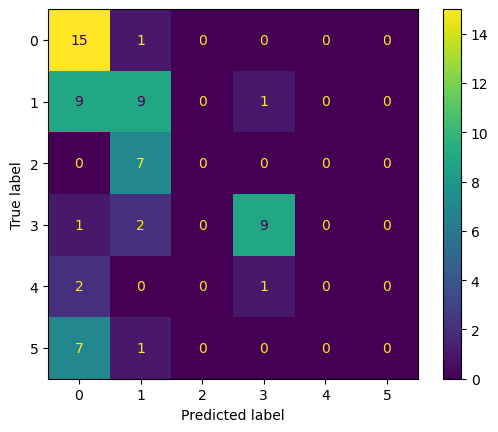

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm)
disp.plot()